# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2} R^{d}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [3]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R рекурентным методом

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi**(D / 2) / sp.gamma(1 + D / 2) * R**D
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

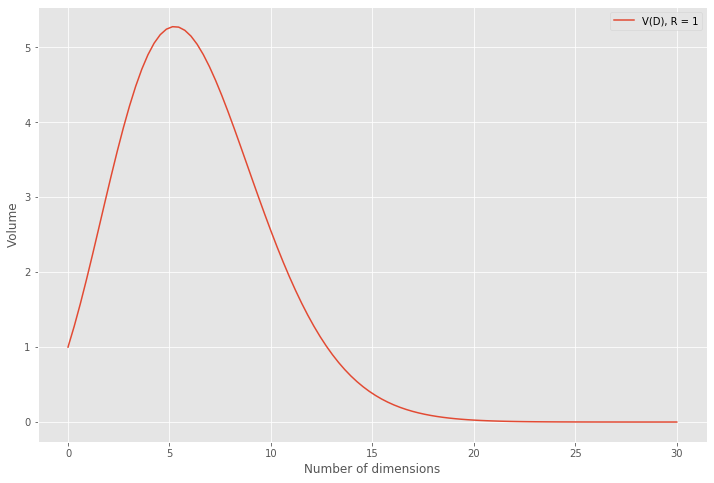

In [4]:
np.testing.assert_allclose(
[getSphereVolumeExact(2), getSphereVolumeExact(3), getSphereVolumeExact(2, 2), getSphereVolumeExact(3, 2)], #Easy examples to test the code
[np.pi, 4 * np.pi / 3, np.pi * 2**2, 4 * np.pi / 3 * 2**3], #Basic Math knowledge
1e-10)

D = np.linspace(0, 30, 100)

plt.figure(figsize=(12,8))
plt.plot(D, getSphereVolumeExact(D), '-', label='V(D), R = 1')
plt.ylabel('Volume')
plt.xlabel('Number of dimensions')
plt.legend()
plt.show()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [5]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    rand_array = 2 * np.random.rand(N, D) - 1
    bool_array = (np.sum(rand_array**2, axis = 1) <= 1)
    V = (2 * R)**D * np.sum(bool_array) / N
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

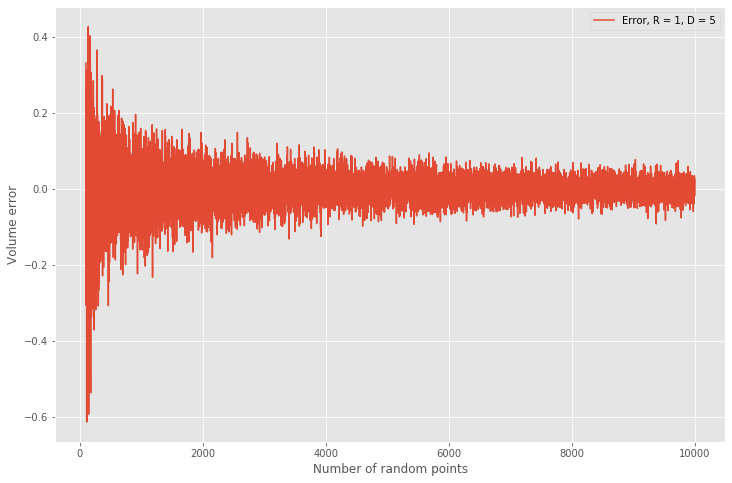

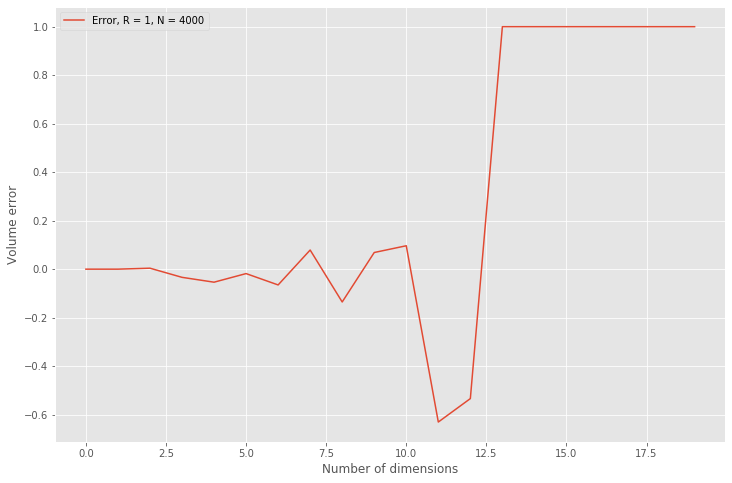

In [24]:
N = np.arange(100, 10000)
D = 5
volume_D = getSphereVolumeExact(D)

#Trying to find a number to take as N
plt.figure(figsize=(12,8))
plt.plot(N, [1 - getSphereVolumePseudorandom(n, D) / volume_D for n in N], '-', label='Error, R = 1, D = %i' % D)
plt.ylabel('Volume error')
plt.xlabel('Number of random points')
plt.legend()
plt.show()

#Let's say that N equals 4000, so we can see results with a good accuracy in the vicinity of the point D = 5
N = 4000
D = np.arange(0, 20)

#Plotting the information about a correlation between an error and a number of dimensions
plt.figure(figsize=(12,8))
plt.plot(D, [1 - getSphereVolumePseudorandom(N, d) / getSphereVolumeExact(d) for d in D], '-', label='Error, R = 1, N = %i' % N)
plt.ylabel('Volume error')
plt.xlabel('Number of dimensions')
plt.legend()
plt.show()

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [7]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [8]:
sobol_seq.i4_sobol_generate?

Signature: sobol_seq.i4_sobol_generate(dim_num, n, skip=0)
Docstring:
i4_sobol_generate generates a Sobol dataset.

Parameters:
  Input, integer dim_num, the spatial dimension.
  Input, integer N, the number of points to generate.
  Input, integer SKIP, the number of initial points to skip.

  Output, real R(M,N), the points.
File:      c:\programdata\anaconda3\lib\site-packages\sobol_seq\sobol_seq.py
Type:      function


In [9]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    rand_array = 2 * sobol_seq.i4_sobol_generate(D, N) - 1
    bool_array = (np.sum(rand_array**2, axis = 1) <= 1)
    V = (2 * R)**D * np.sum(bool_array) / N
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

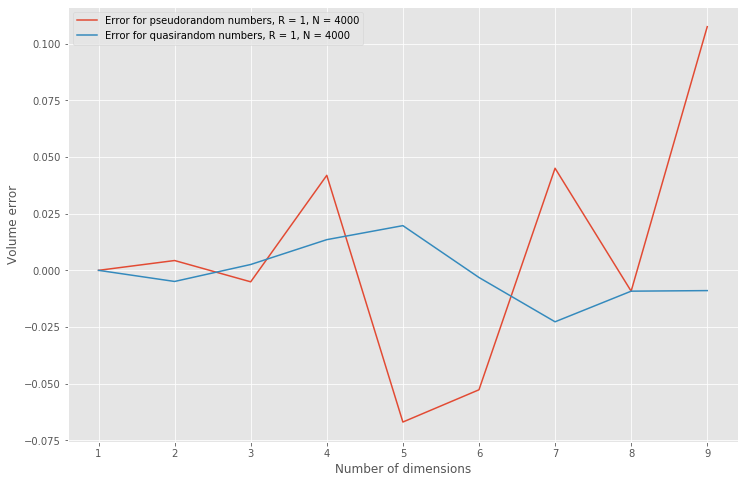

In [10]:
N = 4000
D = np.arange(1, 10)

#Plotting the information about a correlation between an error and a number of dimensions
plt.figure(figsize=(12,8))
plt.plot(D, [1 - getSphereVolumePseudorandom(N, d) / getSphereVolumeExact(d) for d in D], '-', label='Error for pseudorandom numbers, R = 1, N = %i' % N)
plt.plot(D, [1 - getSphereVolumeQuasirandom(N, d) / getSphereVolumeExact(d) for d in D], '-', label='Error for quasirandom numbers, R = 1, N = %i' % N)
plt.ylabel('Volume error')
plt.xlabel('Number of dimensions')
#plt.yscale('log')
plt.legend()
plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

The usage of quasirandom numbers helps to avoid the situation of random clusters of points that can result in a big error. Rerunning the same code shows that very good: an error jumping back and forth depending on the density of the formed clusters.

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [11]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.array([2 * np.round(np.random.rand(N)) - 1 for i in range(N)])
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [12]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = state.shape[0]
    j_ = j if j < N - 1 else 0
    i_ = i if i < N - 1 else 0
    dE = 2 * state[i, j] * (state[i, j - 1] + state[i - 1, j] + state[i, j_] + state[i_, j])
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [13]:
def makeFlip(T, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    for k in range(N**2):
        i, j = np.around(N * np.random.rand(2) - 1)
        i = int(i)
        j = int(j)
        dE = getDeltaE(i, j, state)
        if dE < 0:
            state[i, j] = -state[i, j]
        else:
            posib = np.exp(-dE / T)
            ran = np.random.rand()
            if ran < posib:
                state[i, j] = -state[i, j]
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [14]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    N = state.shape[0]
    E = 0
    for i in range(N):
        for j in range(N):
            j_ = j if j < N - 1 else 0
            i_ = i if i < N - 1 else 0
            E += -state[i, j] * (state[i, j - 1] + state[i - 1, j] + state[i, j_] + state[i_, j])
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [15]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    N = state.shape[0]
    M = 0
    for i in range(N):
        for j in range(N):
            M += state[i, j]
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [16]:
N       = 10         # размер решетки NxN
Nt      = 100         # количество точек температуры
eqSteps = 200        # количество раз выполнения makeFlip для установления равновесия
steps   = 50         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

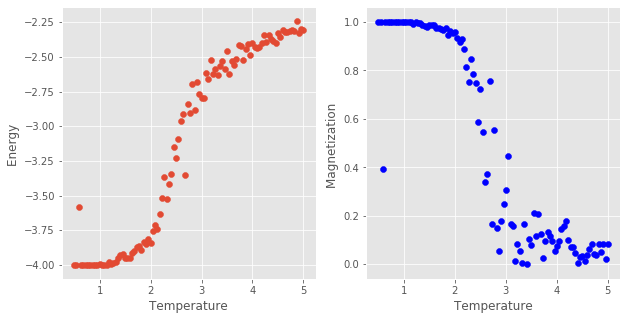

In [17]:
for t in range(Nt):
    print(('Complete %.1f %%\r' % (t/Nt*100)), end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

As we know, magentic field affects the state of the molecular magnetic features of an object, so the molecular spins will rotate towards the external field. But the kinetic energy prevents it from staying in that one state. As a result, the most energy-optimal state is when mostly every spin "looking" towards the field (the same direction), that can be seen on the low temperatures. The oposite effect can be seen on the high temperatures: no magnetization and higher overall energy.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [21]:
N = 64
state = getInitialState(N)
temp = state

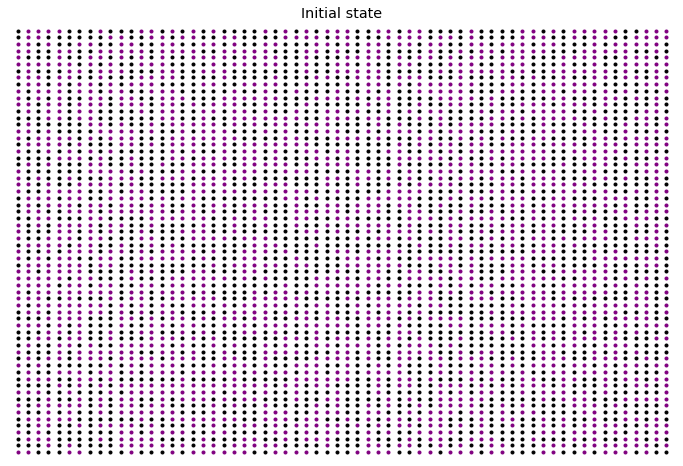

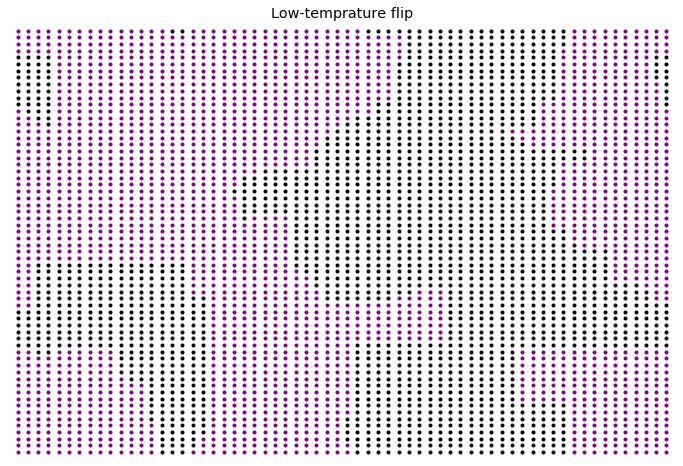

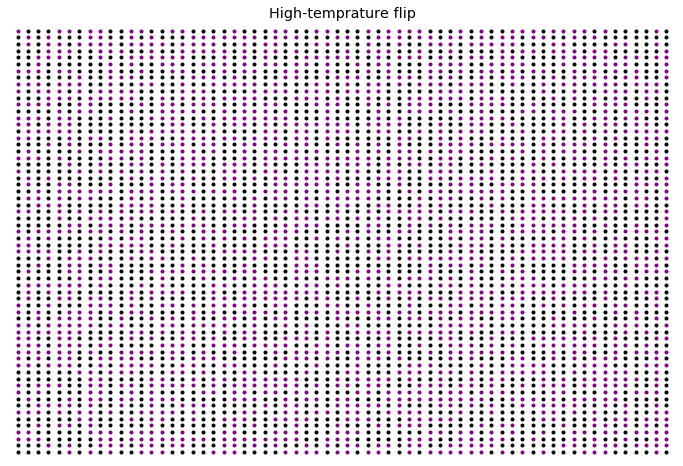

In [23]:
plt.figure(figsize=(12,8))
plt.xlim((-1, 64))
plt.ylim((-1, 64))
plt.plot(np.nonzero(state - 1)[1], np.nonzero(state - 1)[0], '.', color = 'purple')
plt.plot(np.nonzero(state + 1)[1], np.nonzero(state + 1)[0], '.', color = 'black')
plt.grid(False)
plt.title('Initial state')
plt.axis('off')
plt.show()

for i in range(50):
    makeFlip(0.5, state);

plt.figure(figsize=(12,8))
plt.xlim((-1, 64))
plt.ylim((-1, 64))
plt.plot(np.nonzero(state - 1)[1], np.nonzero(state - 1)[0], '.', color = 'purple')
plt.plot(np.nonzero(state + 1)[1], np.nonzero(state + 1)[0], '.', color = 'black')
plt.grid(False)
plt.title('Low-temprature flip')
plt.axis('off')
plt.show()

state = temp

for i in range(50):
    makeFlip(100, state);

plt.figure(figsize=(12,8))
plt.xlim((-1, 64))
plt.ylim((-1, 64))
plt.plot(np.nonzero(state - 1)[1], np.nonzero(state - 1)[0], '.', color = 'purple')
plt.plot(np.nonzero(state + 1)[1], np.nonzero(state + 1)[0], '.', color = 'black')
plt.grid(False)
plt.title('High-temprature flip')
plt.axis('off')
plt.show()

As we can see, when the temperature is low enough, there are groups of points with the same spin value. These are called magnetic domains. And, when the temperature is very high, there is only chaos.